In [1]:
#import libraries 

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df1 = pd.read_csv("final_5ds.csv",encoding = "unicode_escape")



In [3]:
df1.head()

,LOWER COND TEMP AT INELT',LOWER COND TEMP AT OUTLET,UPPER COND TEMPE AT INELT,UPPER COND TEMPE AT OUTLET,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER OUTLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,BENZOL WASHER RESISTANCE,RICH OIL FLOW(M3/hr),RICH OIL INLET TEMP TO PIPEHEATER,...,Dry basis,wet basis,Actual,Dry basis.1,Consumer(from FMD),Flare(Flow meter),Tot Gas to Battry,SAP production,0,SAP production.1
0,°C,°C,°C,°C,°C,°C,°C,kpa,M3/hr,°C,...,MT,MT,NM3,NM3,NM3,NM3,NM3,MT(Tar),Yield,MT(Benz)
1,33.99,30.02,27.36,22.18,27.58,35.97,27.58,3.12,65.39,152.66,...,0,0,0,0,0,0,0,0,0,0
2,34.29,31,27.66,22.75,27.39,36.58,27.39,3.35,65.58,152.94,...,0,0,0,0,0,0,0,0,0,0
3,34.11,31.92,26.67,22.81,27.59,37.54,27.59,2.36,65.43,152.46,...,0,0,0,0,0,0,0,0,0,0
4,33.75,31.16,28.5,23.54,28.11,36.7,28.11,2.54,65.46,151.8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df1.shape

(998, 43)

In [5]:
df1.isnull().sum()

LOWER COND TEMP AT INELT'                 0
LOWER COND TEMP AT OUTLET                 0
UPPER COND TEMPE AT INELT                 0
UPPER COND TEMPE AT OUTLET                0
BENZOL WASHER INLET GAS TEMP              0
BENZOL WASHER  OUTLET GAS TEMP            0
BENZOL WASHER  INLET OIL TEMP             0
BENZOL WASHER RESISTANCE                  0
RICH OIL FLOW(M3/hr)                      0
RICH OIL INLET TEMP TO PIPEHEATER         0
RICH OIL PRESSURE AT PIPEHEATER INLET     0
RICH OIL OUTLET TEMP FROM  PIPEHEATER     0
RICH OIL PRESSURE AT PIPEHEATER OUTLET    0
PIPEHEATER MIDDLE TEMP                    0
STEAM INLET TEMP TO PIPEHEATER            0
STEAM OUTLET TEMP FROM PIPEHEATER         0
COG FLOW TO PIPEHEATER                    0
COG PRESSURE TO PIPEHEATER                0
STEAM FLOW TO REGENERATOR (T/hr)          0
STEAM TEMP TO REGENERTOR                  0
DISTILLATION COLUMN TOP TEMP              0
DISTILLATION COLUMN BOTTOM TEMP           0
PRODUCTION (TON)                

In [6]:
df1.head()

,LOWER COND TEMP AT INELT',LOWER COND TEMP AT OUTLET,UPPER COND TEMPE AT INELT,UPPER COND TEMPE AT OUTLET,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER OUTLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,BENZOL WASHER RESISTANCE,RICH OIL FLOW(M3/hr),RICH OIL INLET TEMP TO PIPEHEATER,...,Dry basis,wet basis,Actual,Dry basis.1,Consumer(from FMD),Flare(Flow meter),Tot Gas to Battry,SAP production,0,SAP production.1
0,°C,°C,°C,°C,°C,°C,°C,kpa,M3/hr,°C,...,MT,MT,NM3,NM3,NM3,NM3,NM3,MT(Tar),Yield,MT(Benz)
1,33.99,30.02,27.36,22.18,27.58,35.97,27.58,3.12,65.39,152.66,...,0,0,0,0,0,0,0,0,0,0
2,34.29,31,27.66,22.75,27.39,36.58,27.39,3.35,65.58,152.94,...,0,0,0,0,0,0,0,0,0,0
3,34.11,31.92,26.67,22.81,27.59,37.54,27.59,2.36,65.43,152.46,...,0,0,0,0,0,0,0,0,0,0
4,33.75,31.16,28.5,23.54,28.11,36.7,28.11,2.54,65.46,151.8,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df1.describe()

,LOWER COND TEMP AT INELT',LOWER COND TEMP AT OUTLET,UPPER COND TEMPE AT INELT,UPPER COND TEMPE AT OUTLET,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER OUTLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,BENZOL WASHER RESISTANCE,RICH OIL FLOW(M3/hr),RICH OIL INLET TEMP TO PIPEHEATER,...,Dry basis,wet basis,Actual,Dry basis.1,Consumer(from FMD),Flare(Flow meter),Tot Gas to Battry,SAP production,0,SAP production.1
count,998,998,998,998,998,998,998,998,998,998,...,998,998,998,998,998,998,998,998,998,998
unique,314,337,366,368,418,439,486,272,406,633,...,811,878,840,811,434,450,819,95,813,116
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,80,0,0
freq,282,282,282,281,253,65,242,64,72,52,...,138,102,91,175,545,506,162,223,178,190


In [8]:
for i in df1.columns :
    
    if df1[i].dtype == "int64":
        
        
        mean = df1[i].mean()
        
        df1.fillna(mean,inplace = True)
        
    else:
        
        pass

In [9]:
df1.isnull().sum()

LOWER COND TEMP AT INELT'                 0
LOWER COND TEMP AT OUTLET                 0
UPPER COND TEMPE AT INELT                 0
UPPER COND TEMPE AT OUTLET                0
BENZOL WASHER INLET GAS TEMP              0
BENZOL WASHER  OUTLET GAS TEMP            0
BENZOL WASHER  INLET OIL TEMP             0
BENZOL WASHER RESISTANCE                  0
RICH OIL FLOW(M3/hr)                      0
RICH OIL INLET TEMP TO PIPEHEATER         0
RICH OIL PRESSURE AT PIPEHEATER INLET     0
RICH OIL OUTLET TEMP FROM  PIPEHEATER     0
RICH OIL PRESSURE AT PIPEHEATER OUTLET    0
PIPEHEATER MIDDLE TEMP                    0
STEAM INLET TEMP TO PIPEHEATER            0
STEAM OUTLET TEMP FROM PIPEHEATER         0
COG FLOW TO PIPEHEATER                    0
COG PRESSURE TO PIPEHEATER                0
STEAM FLOW TO REGENERATOR (T/hr)          0
STEAM TEMP TO REGENERTOR                  0
DISTILLATION COLUMN TOP TEMP              0
DISTILLATION COLUMN BOTTOM TEMP           0
PRODUCTION (TON)                

In [10]:


df1.iloc[0]

LOWER COND TEMP AT INELT'                       °C
LOWER COND TEMP AT OUTLET                       °C
UPPER COND TEMPE AT INELT                       °C
UPPER COND TEMPE AT OUTLET                      °C
BENZOL WASHER INLET GAS TEMP                    °C
BENZOL WASHER  OUTLET GAS TEMP                  °C
BENZOL WASHER  INLET OIL TEMP                   °C
BENZOL WASHER RESISTANCE                       kpa
RICH OIL FLOW(M3/hr)                         M3/hr
RICH OIL INLET TEMP TO PIPEHEATER               °C
RICH OIL PRESSURE AT PIPEHEATER INLET          Mpa
RICH OIL OUTLET TEMP FROM  PIPEHEATER           °C
RICH OIL PRESSURE AT PIPEHEATER OUTLET         Mpa
PIPEHEATER MIDDLE TEMP                          °C
STEAM INLET TEMP TO PIPEHEATER                  °C
STEAM OUTLET TEMP FROM PIPEHEATER               °C
COG FLOW TO PIPEHEATER                       m³/hr
COG PRESSURE TO PIPEHEATER                     kpa
STEAM FLOW TO REGENERATOR (T/hr)               TPH
STEAM TEMP TO REGENERTOR       

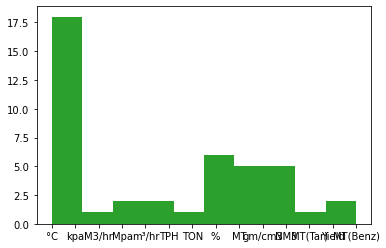

In [11]:
l = df1.iloc[0].values

for i in l :
    
    plt.hist(l)

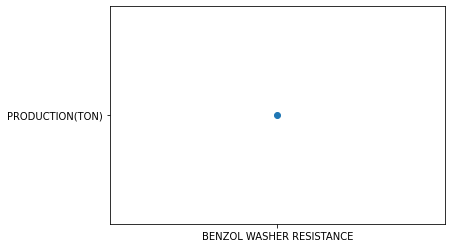

In [12]:
plt.scatter("BENZOL WASHER RESISTANCE","PRODUCTION(TON)")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

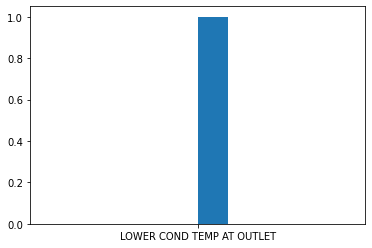

In [13]:
plt.hist("LOWER COND TEMP AT OUTLET")

In [14]:
#BEMZ WASHER INLET OIL TEM VS BENZOL WASHER INLET GAS TEMP 

#RES VS PROD 

#DIST COL BT AMS TP VS PRD TEMP 


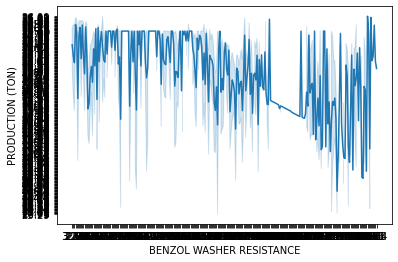

In [15]:
sns.lineplot(x = df1.iloc[1:,7],y = df1.iloc[1:,22])

plt.show()

In [16]:
df1.iloc[0]

LOWER COND TEMP AT INELT'                       °C
LOWER COND TEMP AT OUTLET                       °C
UPPER COND TEMPE AT INELT                       °C
UPPER COND TEMPE AT OUTLET                      °C
BENZOL WASHER INLET GAS TEMP                    °C
BENZOL WASHER  OUTLET GAS TEMP                  °C
BENZOL WASHER  INLET OIL TEMP                   °C
BENZOL WASHER RESISTANCE                       kpa
RICH OIL FLOW(M3/hr)                         M3/hr
RICH OIL INLET TEMP TO PIPEHEATER               °C
RICH OIL PRESSURE AT PIPEHEATER INLET          Mpa
RICH OIL OUTLET TEMP FROM  PIPEHEATER           °C
RICH OIL PRESSURE AT PIPEHEATER OUTLET         Mpa
PIPEHEATER MIDDLE TEMP                          °C
STEAM INLET TEMP TO PIPEHEATER                  °C
STEAM OUTLET TEMP FROM PIPEHEATER               °C
COG FLOW TO PIPEHEATER                       m³/hr
COG PRESSURE TO PIPEHEATER                     kpa
STEAM FLOW TO REGENERATOR (T/hr)               TPH
STEAM TEMP TO REGENERTOR       

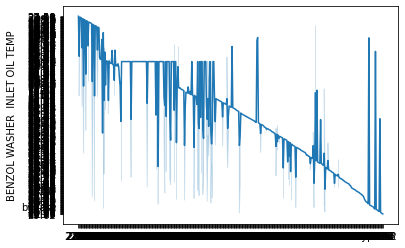

In [17]:
sns.lineplot(x = df1.iloc[1:,4].values, y = df1.iloc[1:,6])

plt.show()



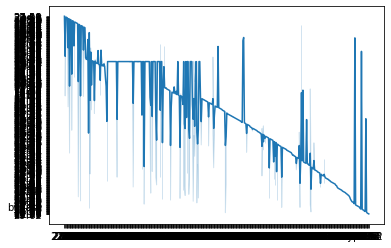

In [18]:
sns.lineplot(x = df1.iloc[1:,4].values, y = df1.iloc[1:,6].values)

plt.show()

In [ ]:
for i in df1.columns :
    
    
    if df1[i].dtype  == "int64" :
        
        df1.fillna(df[i].mean(),inplace = True, axis = 0)
        
    if df1[i].dtype == "str":
        
        df1[i].replace(0)

In [ ]:
df1.isnull().sum()

In [ ]:
X = df1.iloc[1:,[4,6,7,11,13,15,18,20,21,38]].values

y = df1.iloc[1:,22].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
rf_y_pred = rf_model.predict(X_test)

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R^2 Score:", rf_r2)

print("Decision Tree - Mean Squared Error:", dt_mse)
print("Decision Tree - R^2 Score:", dt_r2)
